In [2]:
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=40

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

__Data:__ 
conflicting clinical genomic classification
<br>
https://www.kaggle.com/kevinarvai/clinvar-conflicting



__Column Name Descriptions:__
- CHROM Chromosome the variant is located on
<br>
- POS Position on the chromosome the variant is located on.
<br>
- REF Reference Allele
<br>
- ALT Alternate Allele
<br>
- AF_ESP Allele frequencies from GO-ESP
<br>
- AF_EXAC Allele frequencies from ExAC
<br>
- AF_TGP Allele frequencies from the 1000 genomes project
<br>
- CLNDISDB Tag-value pairs of disease database name and identifier, e.g. OMIM:NNNNNN
<br>
- CLNDISDBINCL For included Variant: Tag-value pairs of disease database name and identifier, e.g.OMIM:NNNNNN
<br>
- CLNDN ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB
<br>
- CLNDNINCL For included Variant : ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB
<br>
- CLNHGVS Top-level (primary assembly, alt, or patch) HGVS expression.
<br>
- CLNSIGINCL Clinical significance for a haplotype or genotype that includes this variant. Reported as pairs of VariationID:clinical significance.
<br>
- CLNVC Variant Type
<br>
- CLNVI the variant's clinical sources reported as tag-value pairs of database and variant identifier
<br>
- MC comma separated list of molecular consequence in the form of Sequence Ontology ID|molecular_consequence
<br>
- ORIGIN Allele origin. One or more of the following values may be added: 0 - unknown; 1 - germline; 2 - somatic; 4 - inherited; 8 - paternal; 16 - maternal; 32 - de-novo; 64 - biparental; 128 - uniparental; 256 - not-tested; 512 - tested-inconclusive; 1073741824 - other
<br>
- SSR Variant Suspect Reason Codes. One or more of the following values may be added: 0 - unspecified, 1 - Paralog, 2 - byEST, 4 - oldAlign, 8 - Para_EST, 16 - 1kg_failed, 1024 - other
<br>
- CLASS The binary representation of the target class. 0 represents no conflicting submissions and 1 represents conflicting submissions.
<br>
- Allele the variant allele used to calculate the consequence
<br>
- Consequence Type of consequence: https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html#consequences
<br>
- IMPACT the impact modifier for the consequence type
<br>
- SYMBOL Gene Name
<br>
- Feature_type type of feature. Currently one of Transcript, RegulatoryFeature, MotifFeature.
<br>
- Feature Ensembl stable ID of feature
<br>
- BIOTYPE Biotype of transcript or regulatory feature
<br>
- EXON the exon number (out of total number)
<br>
- INTRON the intron number (out of total number)
<br>
- cDNA_position relative position of base pair in cDNA sequence
<br>
- CDS_position relative position of base pair in coding sequence
<br>
- Protein_position relative position of amino acid in protein
<br>
- Amino_acids only given if the variant affects the protein-coding sequence
<br>
- Codons the alternative codons with the variant base in upper case
<br>
- DISTANCE Shortest distance from variant to transcript
<br>
- STRAND defined as + (forward) or - (reverse).
<br>
- BAM_EDIT Indicates success or failure of edit using BAM file
<br>
- SIFT the SIFT prediction and/or score, with both given as prediction(score)
<br>
- PolyPhen the PolyPhen prediction and/or score
<br>
- MOTIF_NAME the source and identifier of a transcription factor binding profile aligned at this position
<br>
- MOTIF_POS The relative position of the variation in the aligned TFBP
<br>
- HIGH_INF_POS a flag indicating if the variant falls in a high information position of a transcription factor 
binding profile (TFBP)
<br>
- MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP
<br>
- LoFtool Loss of Function tolerance score for loss of function variants: https://github.com/konradjk/loftee
<br>
- CADD_PHRED Phred-scaled CADD score. A Phred quality score is a measure of the quality of the identification of the nucleobases generated by automated DNA sequencing.A Phred quality score is a measure of the quality of the identification of the nucleobases generated by automated DNA sequencing.
<br>
- CADD_RAW Score of the deleteriousness of variants: http://cadd.gs.washington.edu/
<br>
- BLOSUM62 See: http://rosalind.info/glossary/blosum62/
<br>

In [3]:
df_cleaned = pd.read_csv('data/data_cleanednlp4.csv')

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_cleaned.head()

,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown,Length,Relative_Location,REF_a,REF_c,REF_g,REF_t,ALT_a,ALT_c,ALT_g,ALT_t
0,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,61,11,4.0,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.001934,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,1/39,NaN,95,45,15.0,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.007253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,1,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,117,67,23.0,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.011122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,2/39,NaN,311,261,87.0,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.042070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,4/39,NaN,576,526,176.0,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.085106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
# Make the "CLASS" column the first column, for easier visualization in the correlation heatmap
cols = list(df_cleaned.columns.values)
cols.remove('CLASS')
cols.insert(0,'CLASS')
df_cleaned = df_cleaned[cols]

In [6]:
df_cleaned.describe(include='all')

,CLASS,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVI,MC,ORIGIN,SSR,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown,Length,Relative_Location,REF_a,REF_c,REF_g,REF_t,ALT_a,ALT_c,ALT_g,ALT_t
count,65188.000000,6.518800e+04,65188,65188,65188.000000,65188.000000,65188.000000,65188,76,65188,76,65188,76,27659,58219,65188.000000,65188.000000,65188,65188,65188,65172,65174,65174,56295,8803,56304,55233,54027.000000,55184,55184,108.000000,65188.000000,31969,24796,2,2.0,2,2.000000,65188.000000,65188.000000,65188.000000,25593.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.00000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,64995.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000,65188.000000
unique,NaN,NaN,866,458,NaN,NaN,NaN,9234,48,9260,54,65188,68,26289,89,NaN,NaN,374,48,4,2328,2,2369,3264,1929,13970,13663,NaN,1262,2220,NaN,NaN,2,4,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,T,NaN,NaN,NaN,MedGen:CN169374,.,not_specified,not_specified,NC_000001.10:g.156107550C>T,179465:Uncertain_significance,UniProtKB_(protein):P04637,SO:0001583|missense_variant,NaN,NaN,T,missense_variant,MODERATE,TTN,Transcript,NM_001267550.1,16/16,47/362,852,1,NaN,A,cGg/cAg,NaN,NaN,OK,benign,Egr1:MA0341.1,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21798,20409,NaN,NaN,NaN,5344,7,5344,7,1,2,124,23034,NaN,NaN,19991,31444,33212,2765,65172,2765,1129,93,31,36,NaN,2005,915,NaN,NaN,31707,13329,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.252102,7.757594e+07,NaN,NaN,0.014511,0.014492,0.015263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.153310,0.003666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1639.317971,NaN,NaN,825.731481,-0.006658,NaN,NaN,NaN,1.0,NaN,-0.080000,0.345058,15.685616,2.554131,-0.402258,0.068325,0.132616,0.038795,0.018500,0.055885,0.03312,0.043980,0.028410,0.042094,0.035912,0.074339,0.042186,0.040590,0.030282,0.026462,0.042508,0.017733,0.082745,0.013745,0.059996,0.011643,0.012932,0.017411,0.000245,0.029545,0.038489,0.015862,0.003789,0.001457,0.000261,0.000077,0.940066,0.135040,0.863579,0.176413,0.011889,0.176167,0.016521,0.619010,0.000215,0.999540,0.000245,3014.104434,0.431450,0.169562,0.348478,0.340400,0.162598,0.317823

In [7]:
df_cleaned.head()

,CLASS,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVI,MC,ORIGIN,SSR,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,CHROM_1,CHROM_2,CHROM_3,CHROM_4,CHROM_5,CHROM_6,CHROM_7,CHROM_8,CHROM_9,CHROM_10,CHROM_11,CHROM_12,CHROM_13,CHROM_14,CHROM_15,CHROM_16,CHROM_16.1,CHROM_17,CHROM_18,CHROM_19,CHROM_20,CHROM_21,CHROM_22,CHROM_MT,CHROM_X,CLNVC_Deletion,CLNVC_Duplication,CLNVC_Indel,CLNVC_Insertion,CLNVC_Inversion,CLNVC_Microsatellite,CLNVC_single_nucleotide_variant,INT,EX,SIFT_deleterious,SIFT_deleterious_low_confidence,SIFT_tolerated,SIFT_tolerated_low_confidence,SIFT_unknown,BIOTYPE_misc_RNA,BIOTYPE_protein_coding,BIOTYPE_unknown,Length,Relative_Location,REF_a,REF_c,REF_g,REF_t,ALT_a,ALT_c,ALT_g,ALT_t
0,0,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,61,11,4.0,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.001934,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,1/39,NaN,95,45,15.0,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.007253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,NaN,SO:0001583|missense_variant,1.0,0.0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,1/39,NaN,117,67,23.0,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.011122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,2/39,NaN,311,261,87.0,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.042070,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,NaN,SO:0001819|synonymous_variant,1.0,0.0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,4/39,NaN,576,526,176.0,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,2068.0,0.085106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


[]

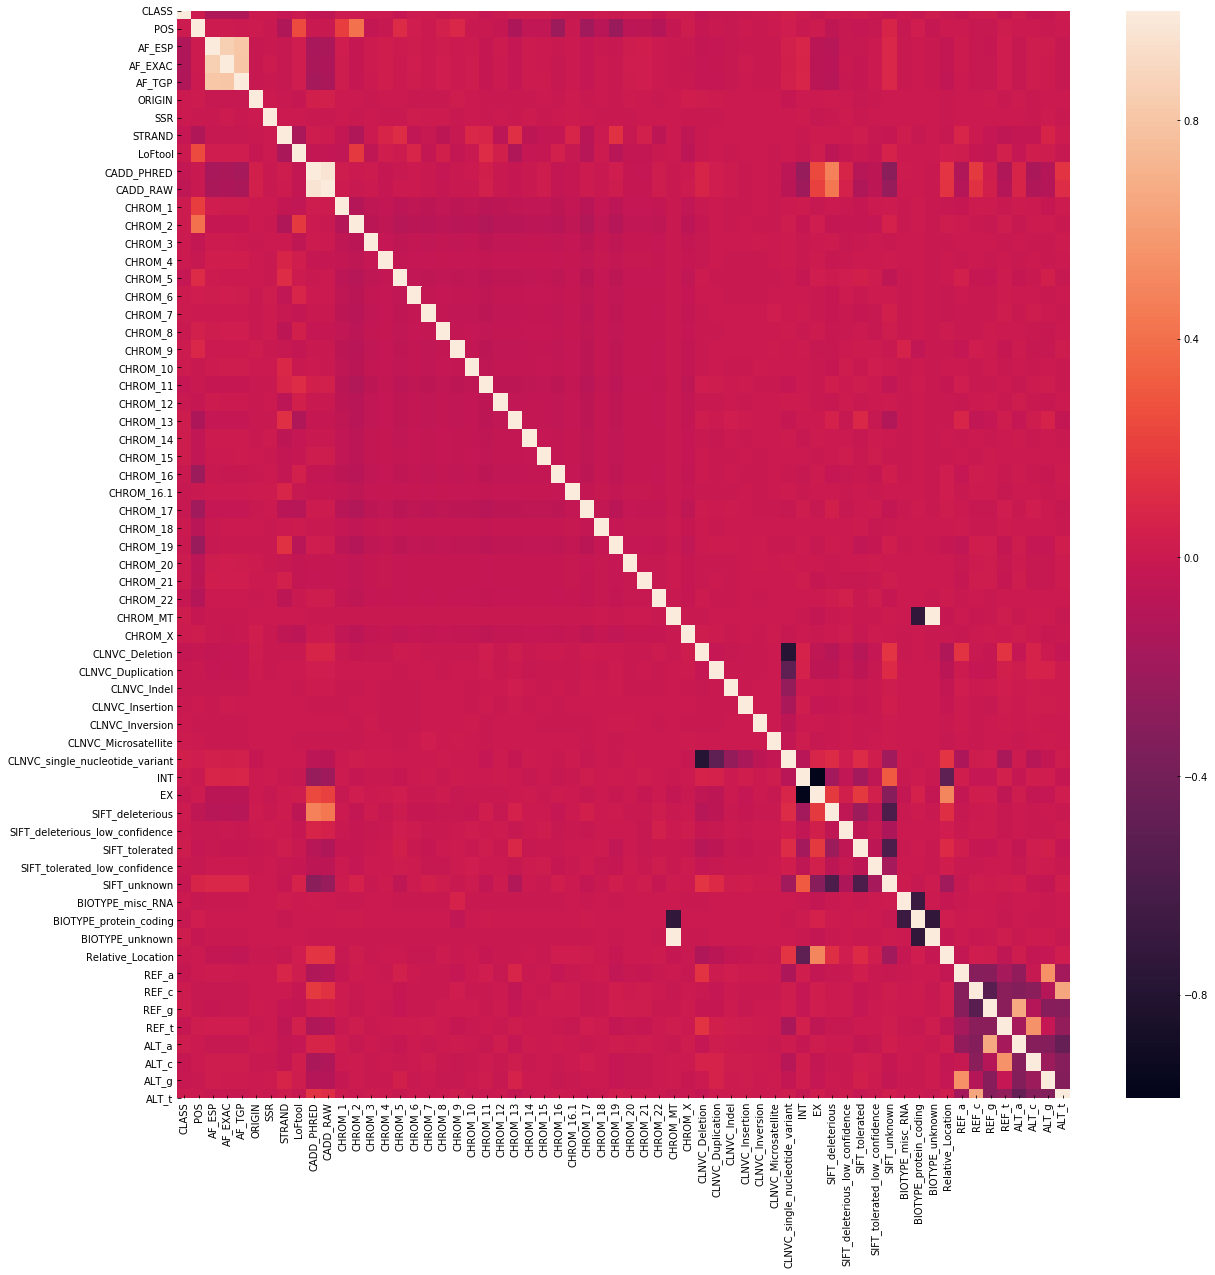

In [8]:
# Are there any apparent trends in correlation between features, particularly between CLASS and other features?
df2 = df_cleaned.dropna(axis=1)
corr = df2.corr()
plt.figure(figsize=(20,20))
_ = sns.heatmap(corr)
plt.plot()

[]

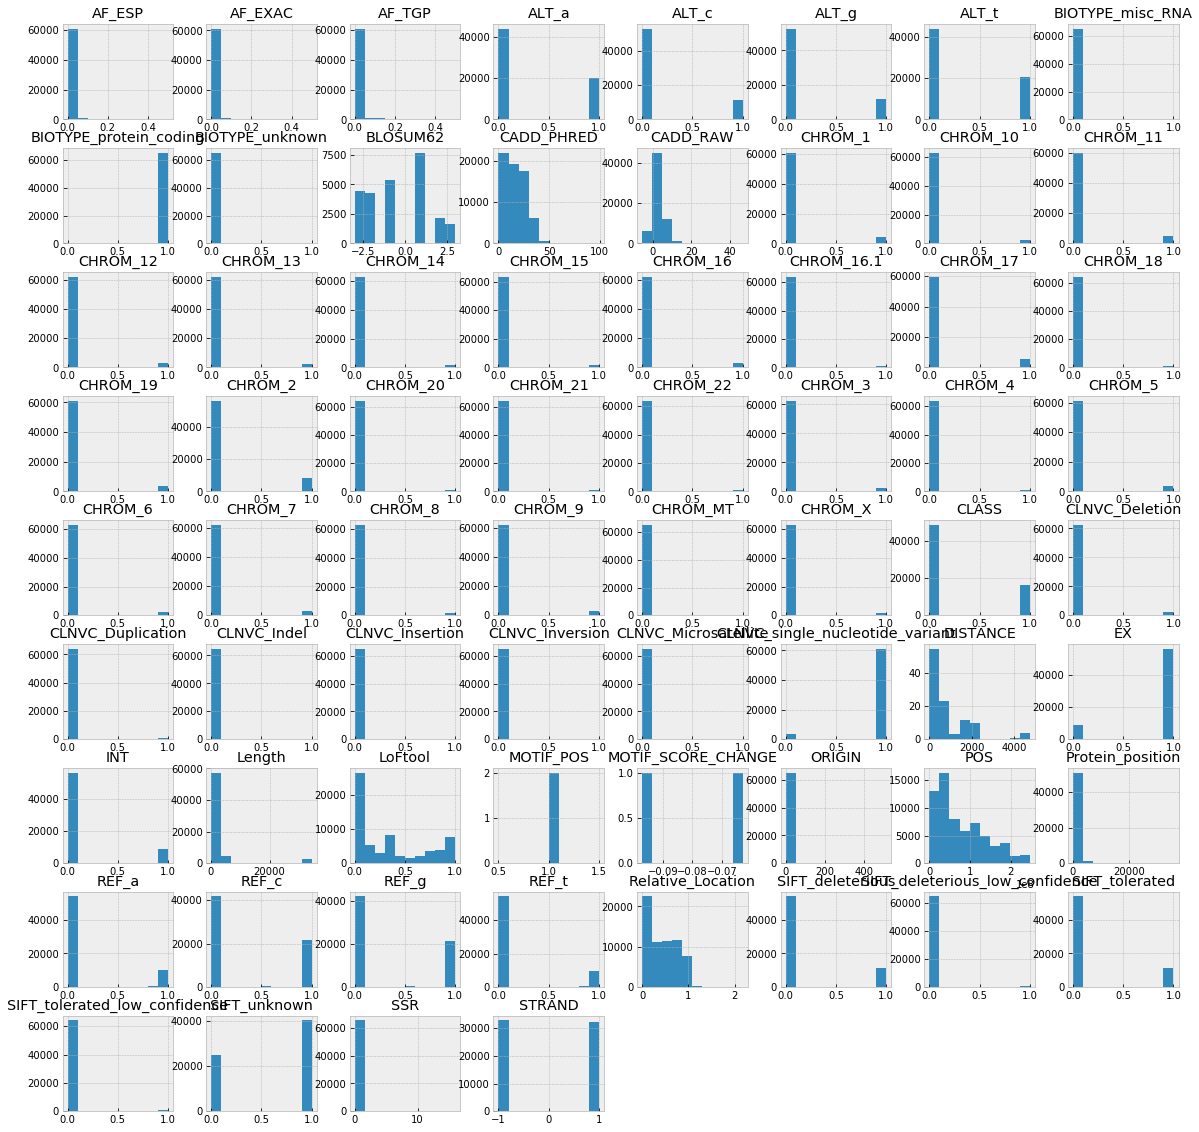

In [9]:
# create a matrix of histograms to visualize distributions of features
_ = df_cleaned.hist(figsize=(20,20))
plt.plot()

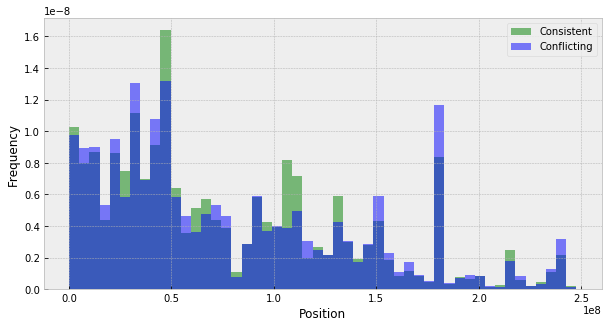

In [10]:
# Noticed some possible correlation between POS  and CLASS
# 2 color histogram plot of CLASS by POS
x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'POS']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'POS']
plt.figure(figsize=(10,5))
plt.hist(x0, alpha=0.5, bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, bins=50, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend();

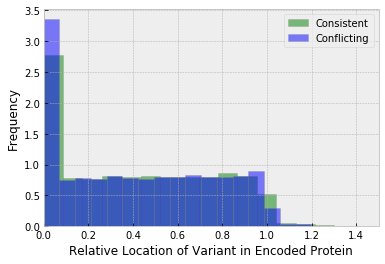

In [11]:
# Do we see any differences in the relative location between classes?
x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'Relative_Location']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'Relative_Location']

plt.hist(x0, alpha=0.5, edgecolor='gray', bins=25, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, edgecolor='gray', bins=25, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('Relative Location of Variant in Encoded Protein')
plt.ylabel('Frequency')
plt.xlim(0,1.5)
plt.legend();

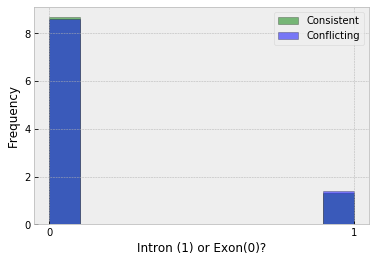

In [12]:
# Do we see any difference in CLASS depending on if the variant is an intron or exon?
x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'INT']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'INT']

plt.hist(x0, alpha=0.5, edgecolor='black', color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, edgecolor='black', color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('Intron (1) or Exon(0)?')
plt.ylabel('Frequency')
plt.xticks([0,1])
plt.legend();

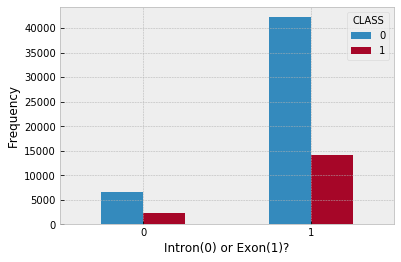

In [24]:
_ = pd.crosstab(df_cleaned['EX'], df_cleaned['CLASS']).plot(kind='bar')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Intron(0) or Exon(1)?')
_ = plt.xticks(rotation=0)

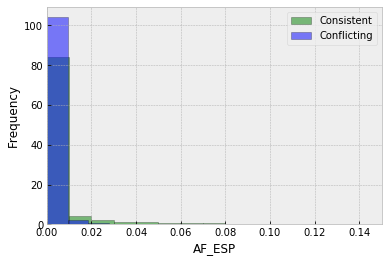

In [13]:
# Do we see any differerences in the spread of AF_ESP in the different classes?
x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'AF_ESP']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'AF_ESP']

plt.hist(x0, alpha=0.5, edgecolor='black', bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, edgecolor='black', bins=50, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('AF_ESP')
plt.ylabel('Frequency')
plt.xlim(0, 0.15)
plt.legend();

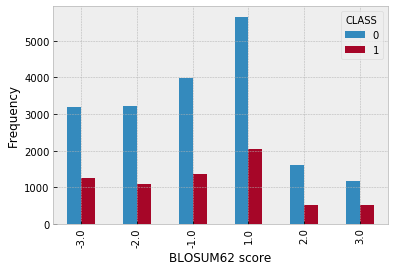

In [27]:
# Do we see any differences in the BLOSUM62 score between the two classes?
_ = pd.crosstab(df_cleaned.BLOSUM62, df_cleaned.CLASS).plot(kind='bar')
_ = plt.xlabel('BLOSUM62 score')
_ = plt.ylabel('Frequency')

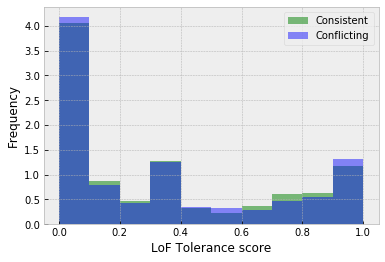

In [15]:
# Do we see any differences in the Loss of Function tolerance score between the two classes
x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'LoFtool']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'LoFtool']

plt.hist(x0, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.45, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('LoF Tolerance score')
plt.ylabel('Frequency')
plt.legend();

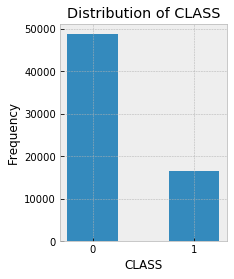

In [16]:
# look at the balance of classes in dataset 
counts = df_cleaned['CLASS'].value_counts()
plt.figure(figsize=(3,4))
_ = plt.bar(counts.index, counts, width=0.5)
_ = plt.xlabel('CLASS')
_ = plt.title('Distribution of CLASS')
_ = plt.xticks([0,1])
_ = plt.ylabel('Frequency')

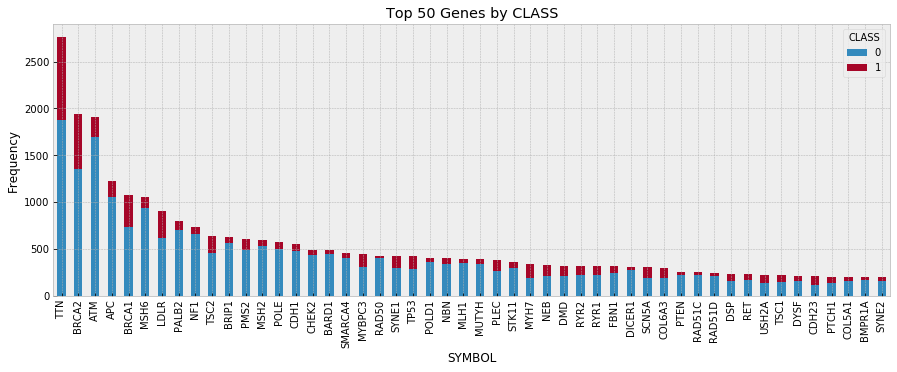

In [17]:
# Are some genes more frequently conflictingly classified? 
# What are the most frequently reported genes in this dataset?

df_stacked = df_cleaned.groupby(['SYMBOL','CLASS'])['SYMBOL'].count().unstack('CLASS')
df_stacked['sum'] = df_stacked[0] + df_stacked[1]
df_stacked = df_stacked.sort_values(by='sum',ascending=False).head(50)
df_stacked.drop('sum', axis=1,inplace=True)

_ = df_stacked.plot(kind='bar', stacked=True,figsize=(15,5))
_ = plt.ylabel('Frequency')
_ = plt.title('Top 50 Genes by CLASS')

[]

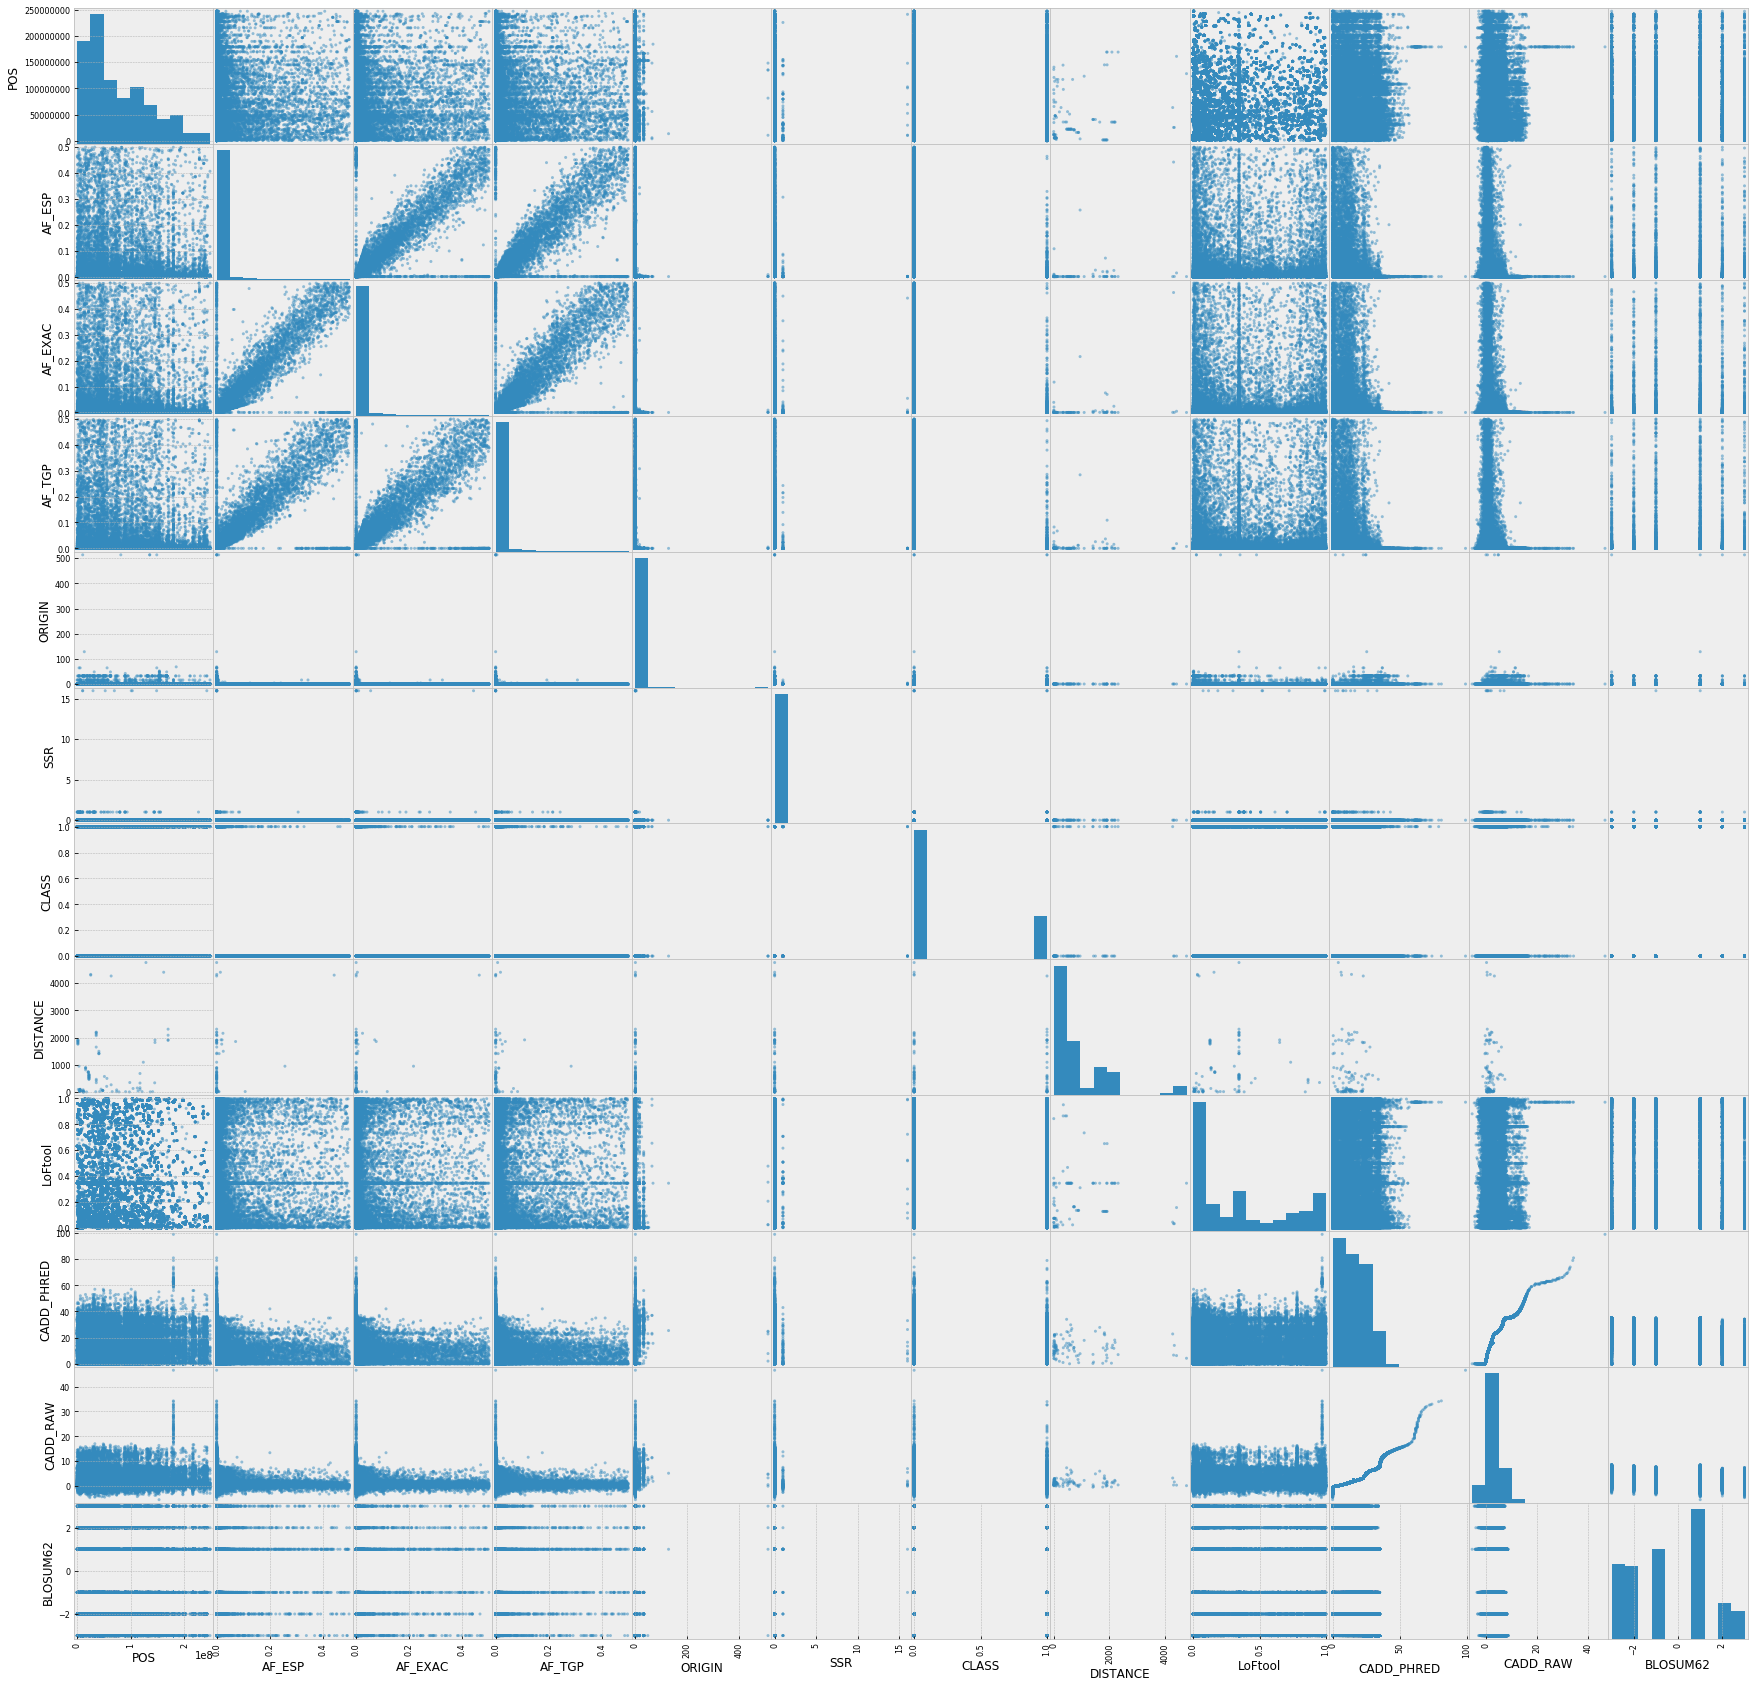

In [18]:
# create a scatter matrix of numerical features

_ = pd.plotting.scatter_matrix(df_cleaned[[ 'POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'ORIGIN', 'SSR', 
                               'CLASS','Feature', 'DISTANCE', 'BAM_EDIT', 'PolyPhen', 
                               'LoFtool','CADD_PHRED','CADD_RAW', 'BLOSUM62']], figsize=(30,30))
plt.plot()

In [19]:
# Lets look at the distribution of variant types 
df_cleaned[['CLNVC_Deletion', 'CLNVC_Duplication', 'CLNVC_Indel', 'CLNVC_Insertion', 
            'CLNVC_Inversion', 'CLNVC_Microsatellite', 'CLNVC_single_nucleotide_variant']].sum()

CLNVC_Deletion                      2509
CLNVC_Duplication                   1034
CLNVC_Indel                          247
CLNVC_Insertion                       95
CLNVC_Inversion                       17
CLNVC_Microsatellite                   5
CLNVC_single_nucleotide_variant    61281
dtype: int64

[]

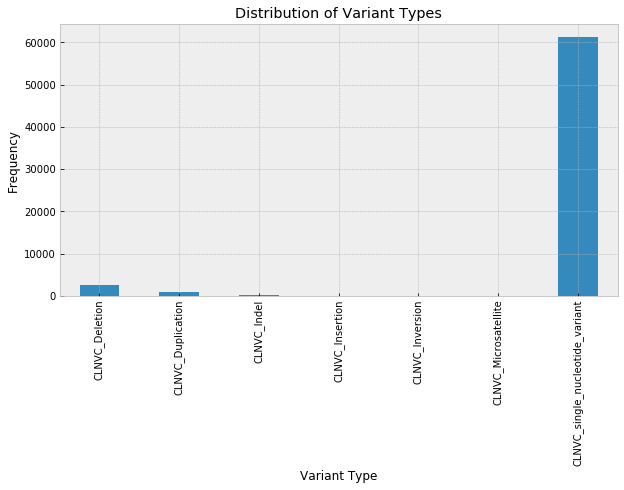

In [20]:
# What is the distribution of variant types in this dataset?

plt.figure(figsize= (10,5))
_ = df_cleaned[['CLNVC_Deletion', 'CLNVC_Duplication', 'CLNVC_Indel', 'CLNVC_Insertion', 
            'CLNVC_Inversion', 'CLNVC_Microsatellite', 'CLNVC_single_nucleotide_variant']].sum().plot(kind='bar')

_ = plt.xlabel('Variant Type')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Variant Types')
plt.plot()

[]

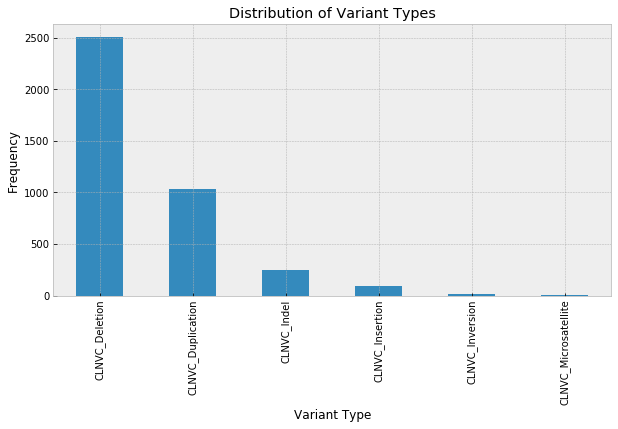

In [21]:
# Take a closer look at variant types not including "single_nucleotide_variant" because there are so many more of those

plt.figure(figsize= (10,5))
_ = df_cleaned[['CLNVC_Deletion', 'CLNVC_Duplication', 'CLNVC_Indel', 'CLNVC_Insertion', 
            'CLNVC_Inversion', 'CLNVC_Microsatellite']].sum().plot(kind='bar')

_ = plt.xlabel('Variant Type')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Variant Types')
plt.plot()

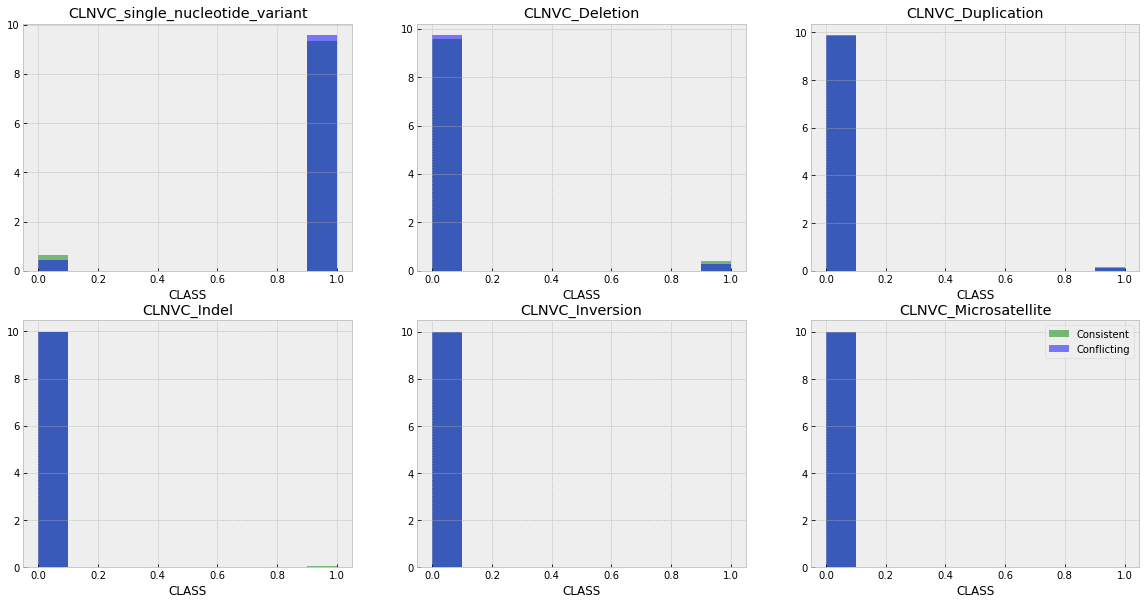

In [22]:
# Is there a difference in CLASS depending on the type of variant?

x0 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_single_nucleotide_variant']
x1 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_single_nucleotide_variant']
x2 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_Deletion']
x3 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_Deletion']
x4 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_Duplication']
x5 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_Duplication']
x6 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_Indel']
x7 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_Indel']
x8 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_Inversion']
x9 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_Inversion']
x10 = df_cleaned.loc[df_cleaned.CLASS==0, 'CLNVC_Microsatellite']
x11 = df_cleaned.loc[df_cleaned.CLASS==1, 'CLNVC_Microsatellite']

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.hist(x0, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_single_nucleotide_variant')

plt.subplot(2,3,2)
plt.hist(x2, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x3, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_Deletion')

plt.subplot(2,3,3)
plt.hist(x4, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x5, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_Duplication')

plt.subplot(2,3,4)
plt.hist(x6, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x7, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_Indel')

plt.subplot(2,3,5)
plt.hist(x8, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x9, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_Inversion')

plt.subplot(2,3,6)
plt.hist(x10, alpha=0.5, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x11, alpha=0.5, color='blue', density=True, stacked=True, label='Conflicting')
plt.xlabel('CLASS')
plt.title('CLNVC_Microsatellite')

plt.legend();

In [68]:
# How many unique variant consequences are there?
print(df_cleaned.Consequence.unique())
print(df_cleaned.Consequence.nunique())

['missense_variant' 'synonymous_variant'
 'splice_region_variant&synonymous_variant'
 'splice_region_variant&intron_variant' 'intron_variant'
 '3_prime_UTR_variant' 'frameshift_variant' 'inframe_insertion'
 'inframe_deletion' 'missense_variant&splice_region_variant' 'stop_lost'
 'stop_gained' '5_prime_UTR_variant'
 'splice_acceptor_variant&coding_sequence_variant&intron_variant'
 'stop_gained&splice_region_variant' 'splice_acceptor_variant'
 'splice_donor_variant' 'start_lost' 'start_lost&5_prime_UTR_variant'
 'downstream_gene_variant'
 'splice_donor_variant&coding_sequence_variant&intron_variant'
 'protein_altering_variant' 'upstream_gene_variant'
 'stop_gained&frameshift_variant'
 'splice_donor_variant&coding_sequence_variant'
 'splice_region_variant&5_prime_UTR_variant'
 'frameshift_variant&splice_region_variant'
 'inframe_deletion&splice_region_variant'
 'splice_acceptor_variant&coding_sequence_variant' 'stop_retained_variant'
 'splice_donor_variant&intron_variant' 'stop_gained&inf

In [57]:
# How many unique disease identifiers are there?
df_cleaned.CLNDN.nunique()

9260